# Regression and Moderation

## Load Data

`data = sm.datasets.anes96.data.load_pandas().data`

`data = sm.datasets.grunfeld.data.load_pandas().data  # mlm`

In [14]:
%load_ext autoreload
%autoreload 2

import statsmodels.api as sm
import glmax

print(dir(glmax))

data = sm.datasets.ccard.data.load_pandas().data.rename_axis("subject")
data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['DUMMY_GLOBAL', 'Moderation', 'Regression', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'analysis', 'ax', 'class_moderation', 'class_regression', 'constants', 'mod', 'pl', 'pp', 'print_models', 'processing', 'simulation', 'sm', 'sys', 'tl', 'utils', 'visualization']


,AVGEXP,AGE,INCOME,INCOMESQ,OWNRENT
subject,,,,,
0,124.98,38.0,4.52,20.4304,1.0
1,9.85,33.0,2.42,5.8564,0.0
2,15.00,34.0,4.50,20.2500,1.0
3,137.87,31.0,2.54,6.4516,0.0
4,546.50,32.0,9.79,95.8441,1.0
...,...,...,...,...,...
67,68.38,43.0,2.40,5.7600,0.0
68,474.15,33.0,6.00,36.0000,1.0
69,234.05,25.0,3.60,12.9600,0.0


## Create Model

In [15]:
fml = "AVGEXP ~ INCOME + AGE + OWNRENT"
self = glmax.Regression(file_path=data, model=fml)

## Tabulate and Plot Descriptives

### Without Group Color-Coding

/home/elizabeth/glmax/glmax/visualization/plot_descriptives.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data, x=v, ax=axs[i, j], hue=y, palette=palette,
/home/elizabeth/glmax/glmax/visualization/plot_descriptives.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data, x=v, ax=axs[i, j], hue=y, palette=palette,
/home/elizabeth/glmax/glmax/visualization/plot_descriptives.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data, x=v, ax=axs[i, j], hue=y, palette=palette,
/home/elizabeth/glmax/glmax/visualization/plot_descriptives.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data, x=v, ax=axs[i, j], hue=y, palette=palette,


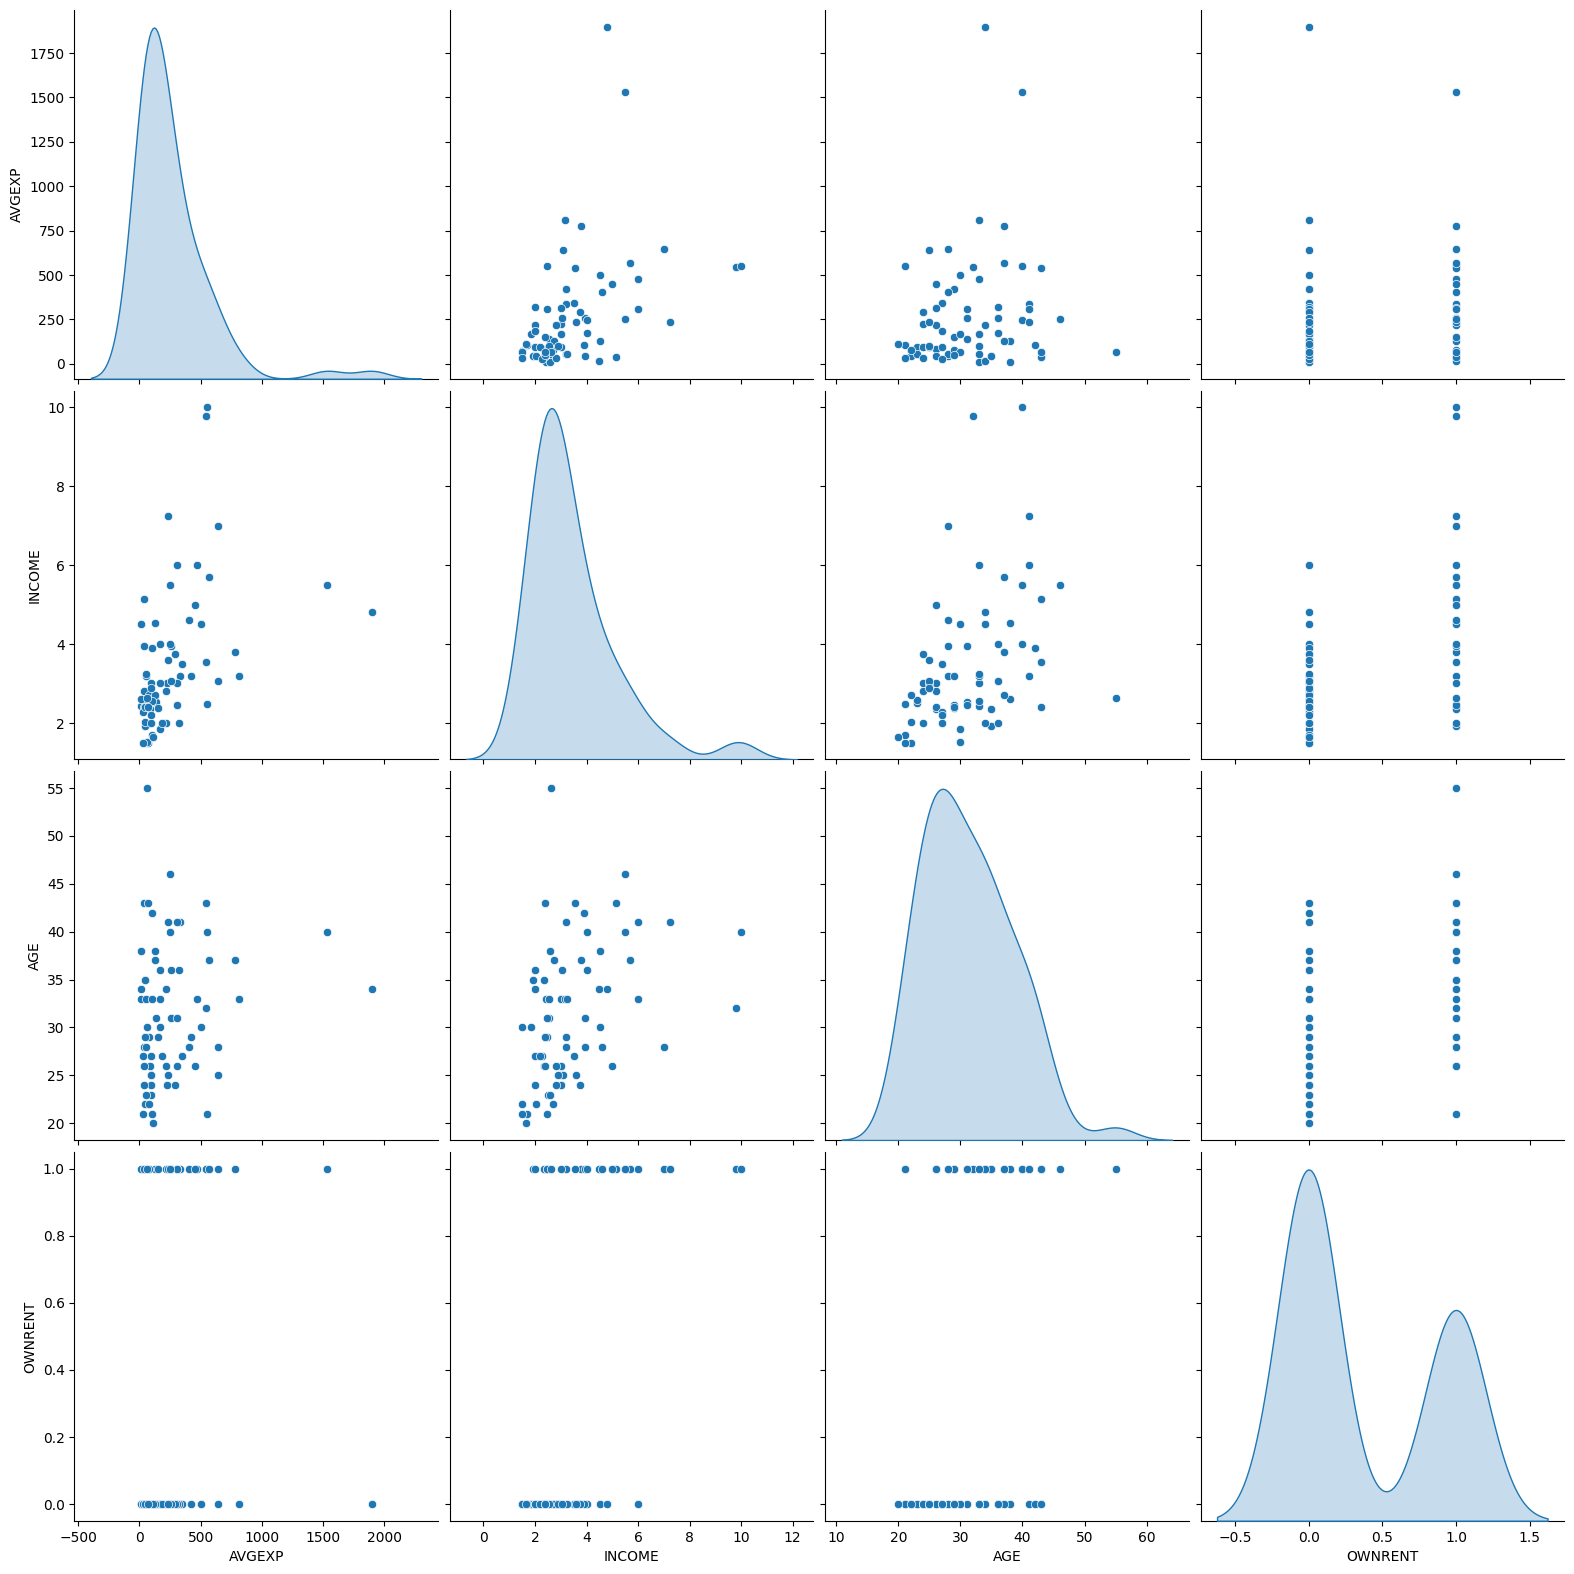

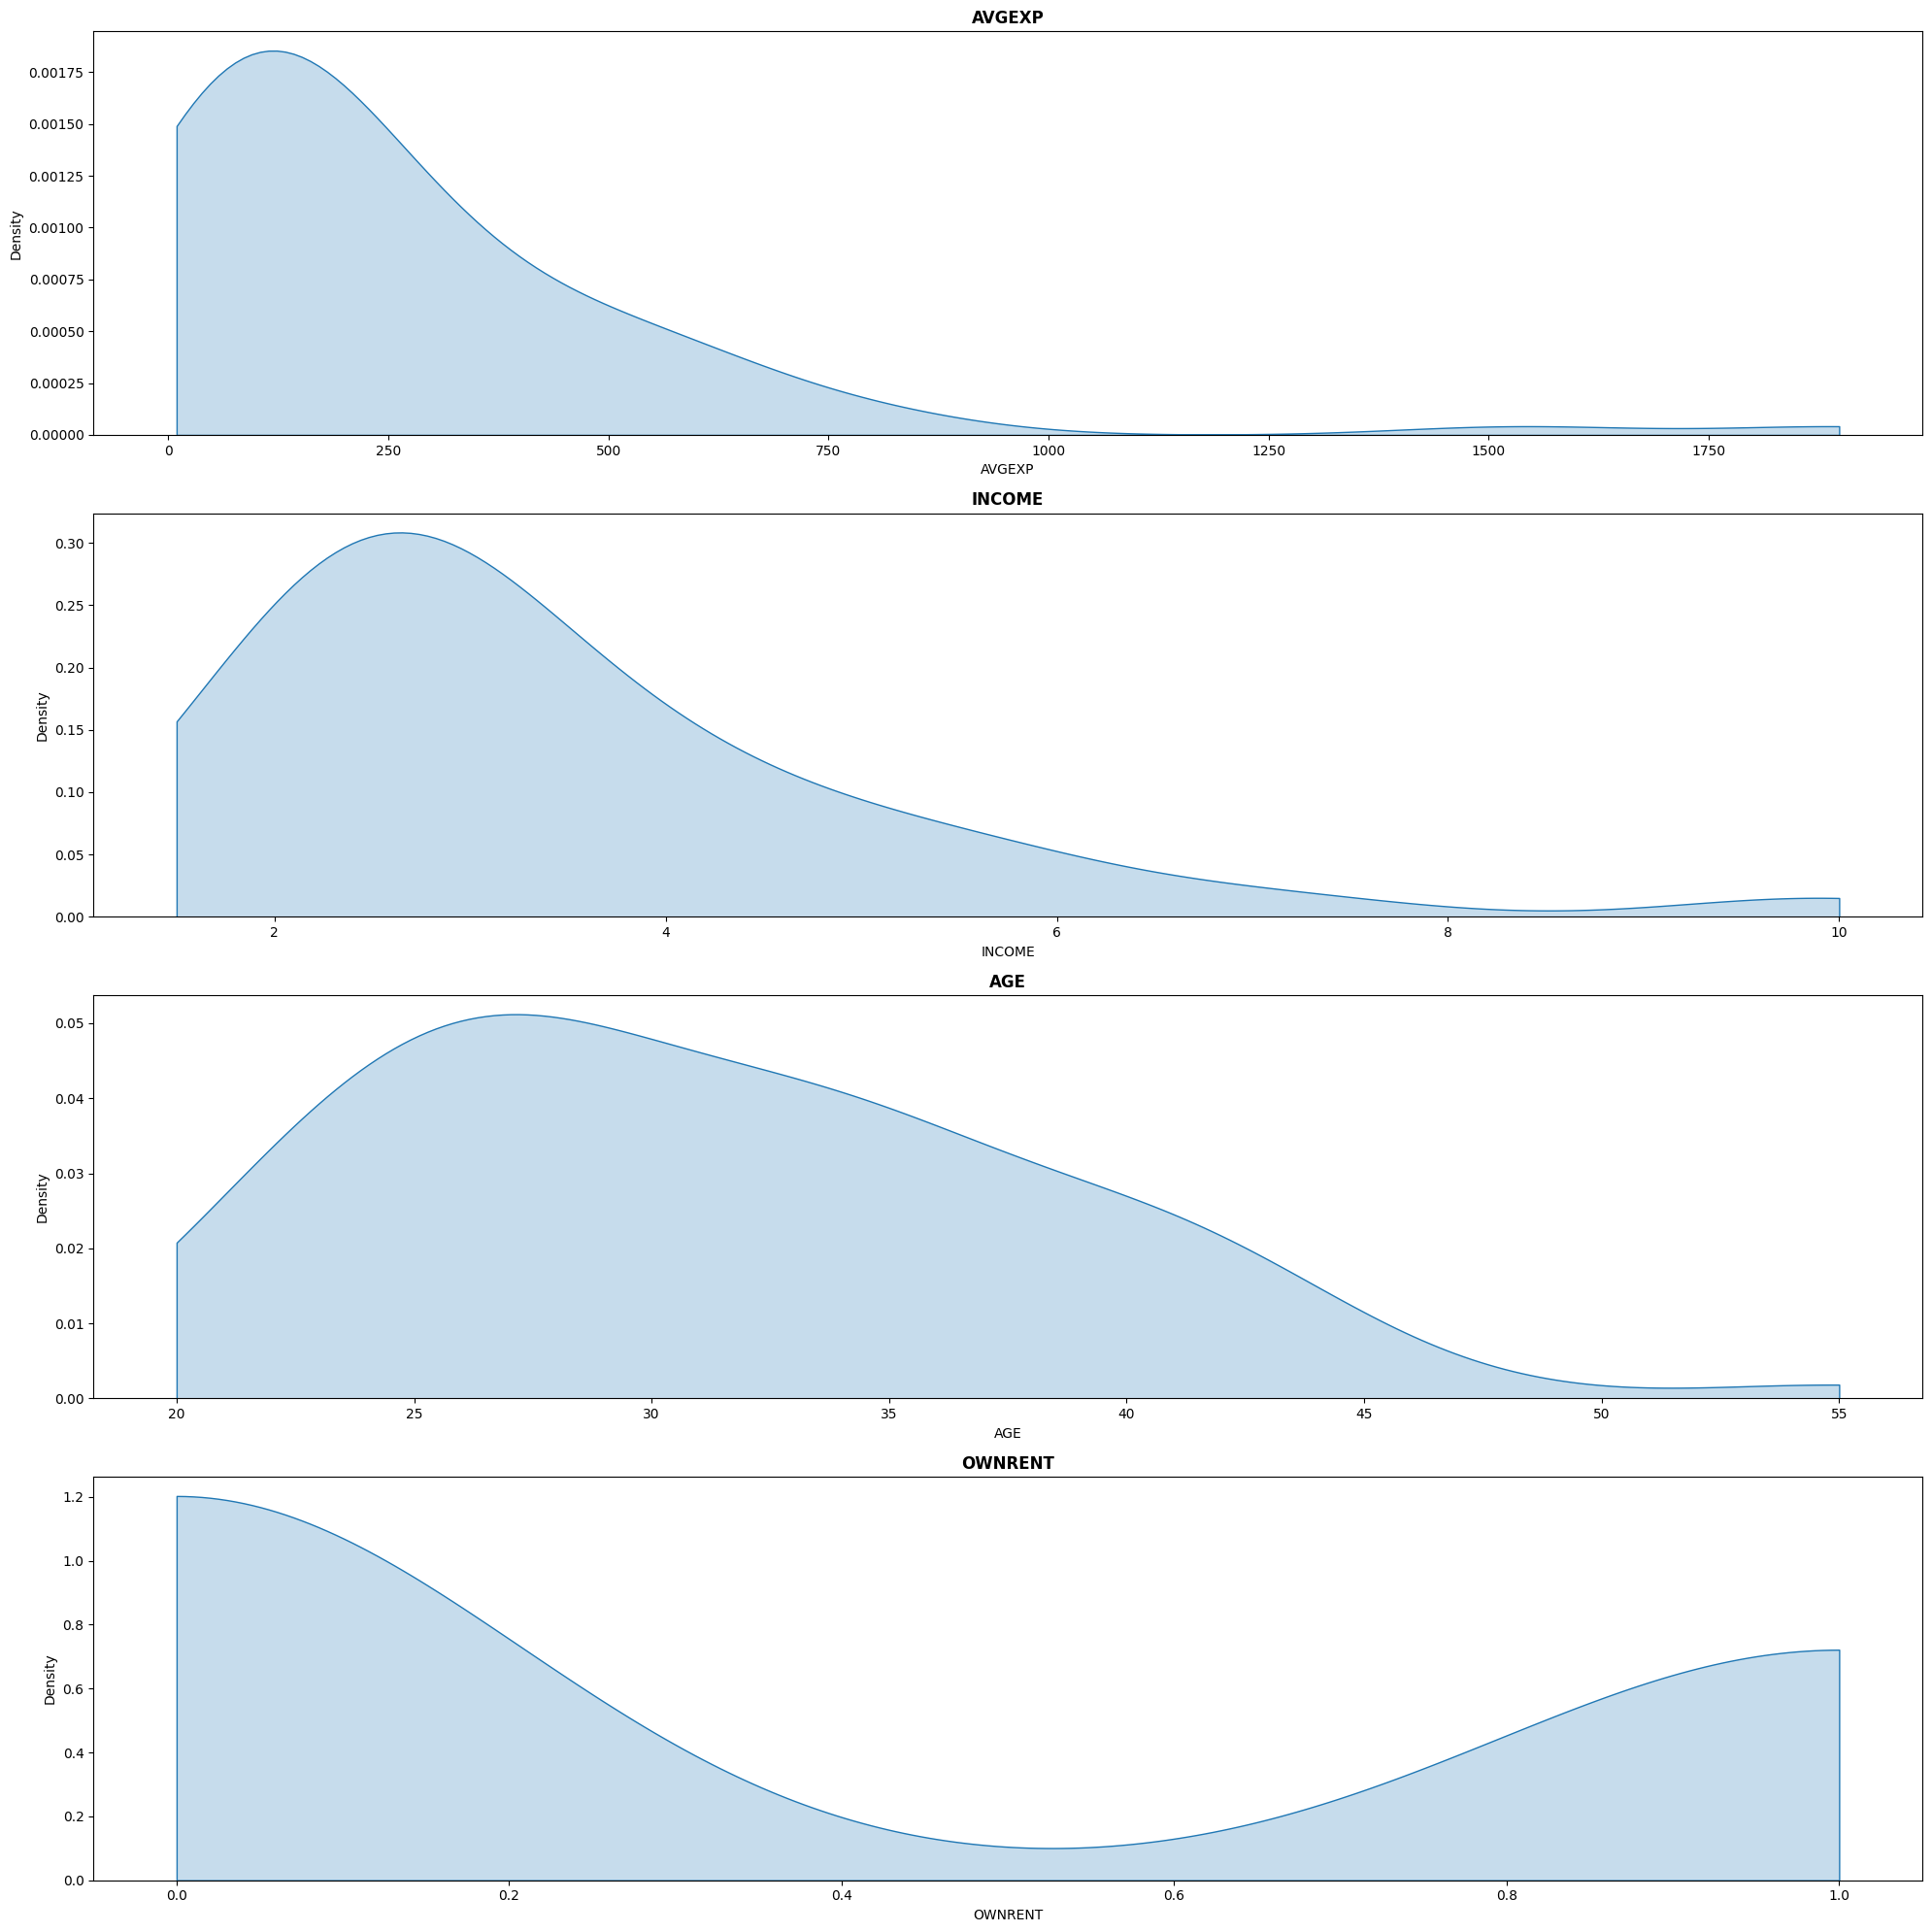

In [16]:
figs = self.describe()

### With Group Color-Coding

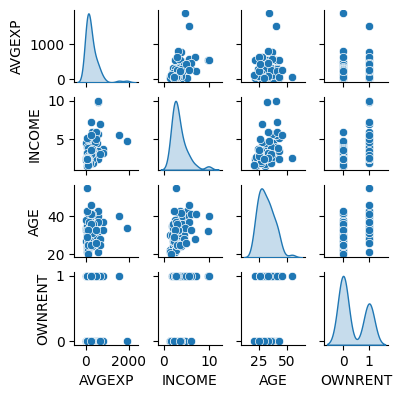

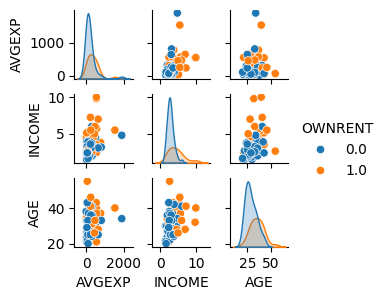

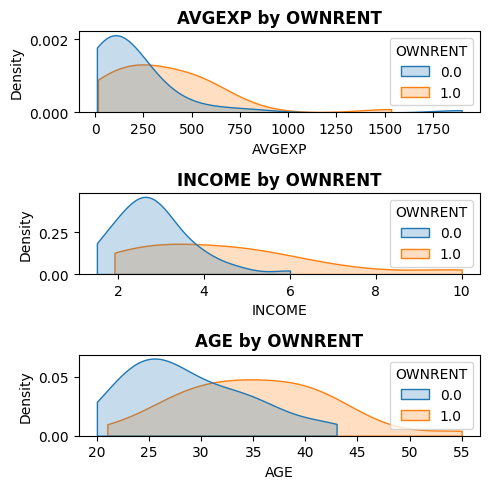

In [17]:
figs = self.describe(groups="OWNRENT", figsize=(5, 5))

## Correlation

                     r      p  p_adjusted
AVGEXP  AVGEXP   1.000  0.000       0.000
        INCOME   0.443  0.000       0.000
        AGE      0.168  0.157       0.157
        OWNRENT  0.243  0.039       0.039
INCOME  AVGEXP   0.443  0.000       0.000
        INCOME   1.000  0.000       0.000
        AGE      0.385  0.001       0.001
        OWNRENT  0.473  0.000       0.000
AGE     AVGEXP   0.168  0.157       0.157
        INCOME   0.385  0.001       0.001
        AGE      1.000  0.000       0.000
        OWNRENT  0.438  0.000       0.000
OWNRENT AVGEXP   0.243  0.039       0.039
        INCOME   0.473  0.000       0.000
        AGE      0.438  0.000       0.000
        OWNRENT  1.000  0.000       0.000


(                        r         p  p_adjusted
 AVGEXP  AVGEXP   1.000000  0.000000    0.000000
         INCOME   0.443135  0.000097    0.000097
         AGE      0.168367  0.157434    0.157434
         OWNRENT  0.243342  0.039422    0.039422
 INCOME  AVGEXP   0.443135  0.000097    0.000097
         INCOME   1.000000  0.000000    0.000000
         AGE      0.385108  0.000837    0.000837
         OWNRENT  0.473079  0.000027    0.000027
 AGE     AVGEXP   0.168367  0.157434    0.157434
         INCOME   0.385108  0.000837    0.000837
         AGE      1.000000  0.000000    0.000000
         OWNRENT  0.438236  0.000118    0.000118
 OWNRENT AVGEXP   0.243342  0.039422    0.039422
         INCOME   0.473079  0.000027    0.000027
         AGE      0.438236  0.000118    0.000118
         OWNRENT  1.000000  0.000000    0.000000,
           AVGEXP   INCOME      AGE  OWNRENT
 AVGEXP    1.0***  0.44***     0.17    0.24*
 INCOME   0.44***   1.0***  0.39***  0.47***
 AGE         0.17  0.39***   1.

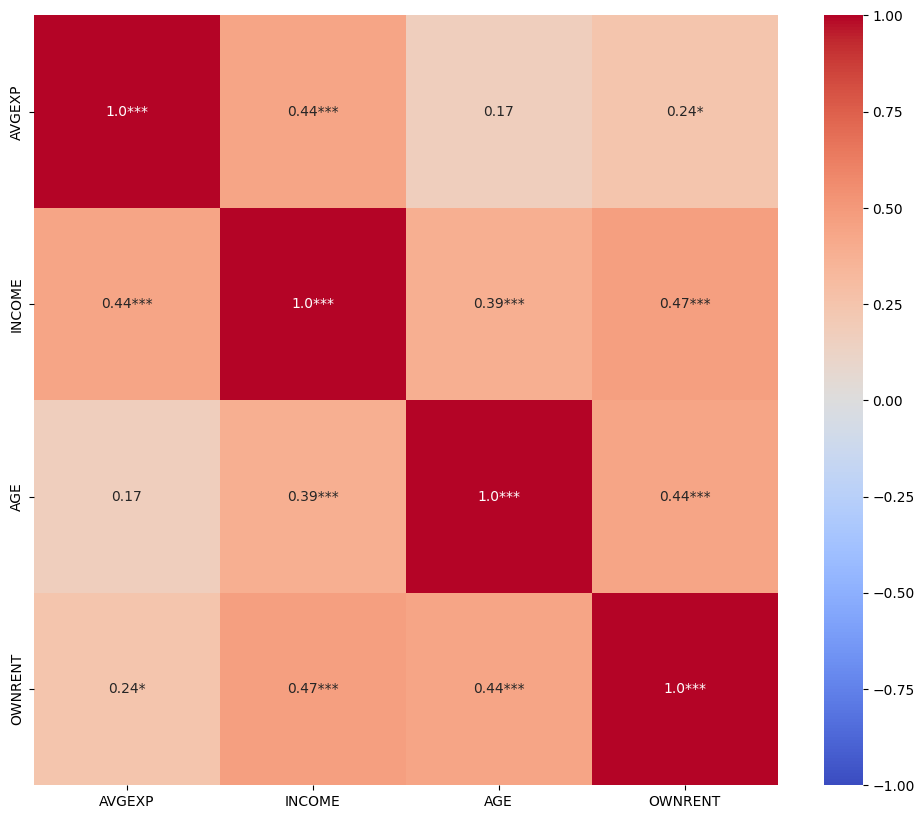

In [18]:
self.correlate()

## See `family` Specifications

In [19]:
glmax.print_models()

Available models:
"binary": [<bound method Model.from_formula of <class 'statsmodels.discrete.discrete_model.Logit'>>]
"count": [<class 'statsmodels.discrete.discrete_model.CountModel'>]
"countmodel": [<class 'statsmodels.discrete.discrete_model.CountModel'>]
"generalizedpoisson": [<class 'statsmodels.discrete.discrete_model.GeneralizedPoisson'>]
"hurdle": [<class 'statsmodels.discrete.truncated_model.HurdleCountModel'>]
"hurdlecountmodel": [<class 'statsmodels.discrete.truncated_model.HurdleCountModel'>]
"logit": [<bound method Model.from_formula of <class 'statsmodels.discrete.discrete_model.Logit'>>]
"mnlogit": [<class 'statsmodels.discrete.discrete_model.MNLogit'>]
"multinomial": [<class 'statsmodels.discrete.discrete_model.MultinomialModel'>]
"multinomialmodel": [<class 'statsmodels.discrete.discrete_model.MultinomialModel'>]
"nbinom": [<class 'statsmodels.discrete.discrete_model.NegativeBinomial'>]
"nbinom_zinf": [<class 'statsmodels.discrete.count_model.ZeroInflatedNegativeBinom

## Regression

### Explore

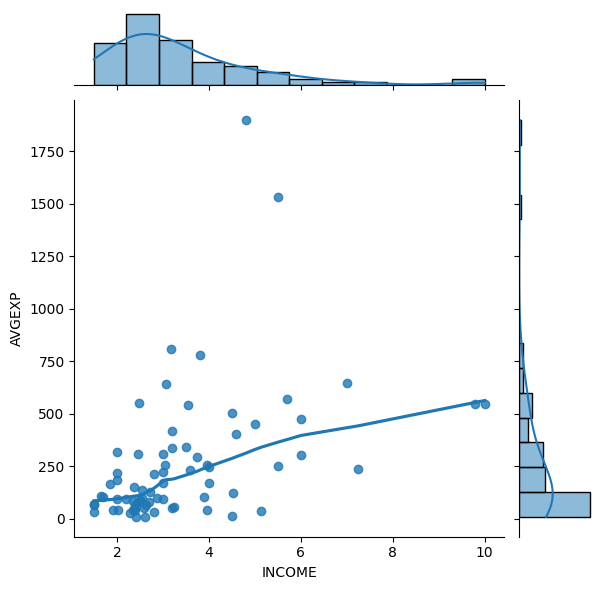

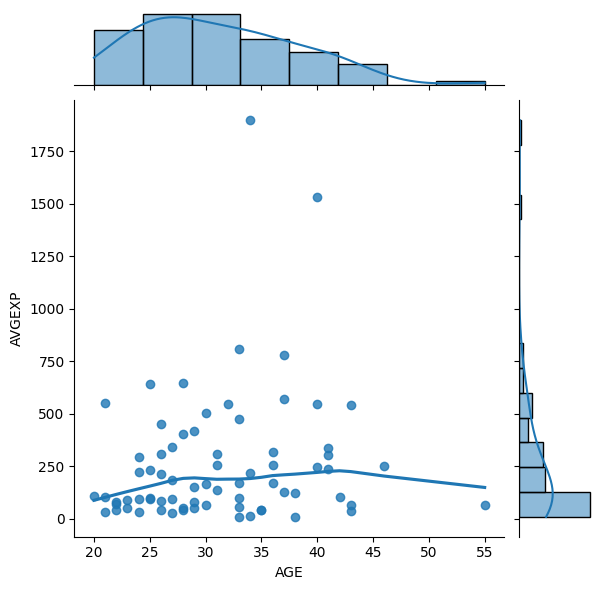

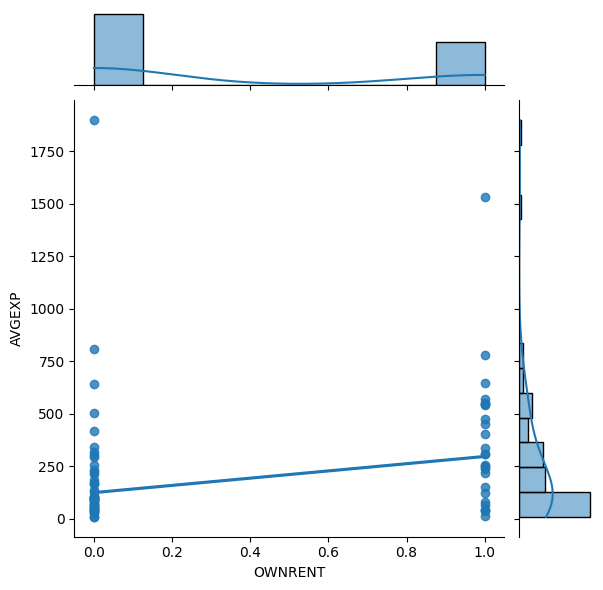

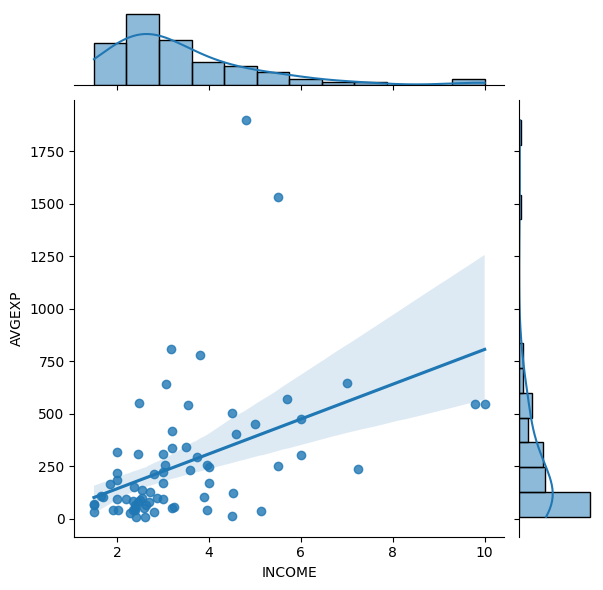

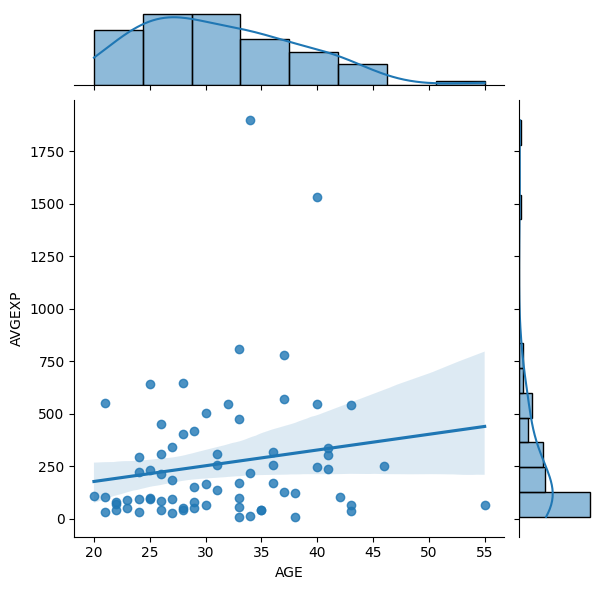

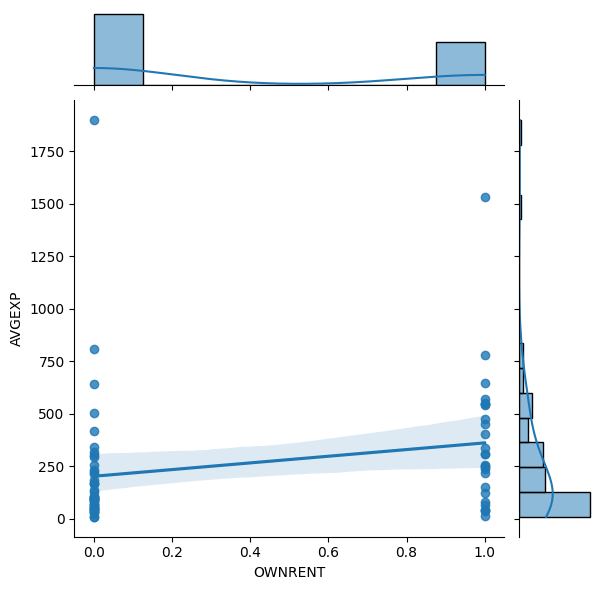

In [60]:
_ = self.plot(plot_dist=True)
_ = self.plot(lowess=False)

### Gaussian

                            OLS Regression Results                            
Dep. Variable:                OWNRENT   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     14.84
Date:                Mon, 10 Mar 2025   Prob (F-statistic):           4.36e-06
Time:                        15:06:09   Log-Likelihood:                -37.053
No. Observations:                  72   AIC:                             80.11
Df Residuals:                      69   BIC:                             86.94
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6182      0.221     -2.800      0.0

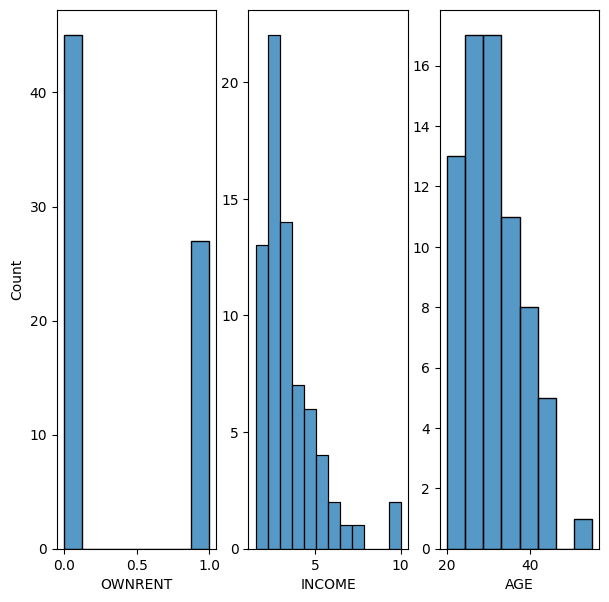

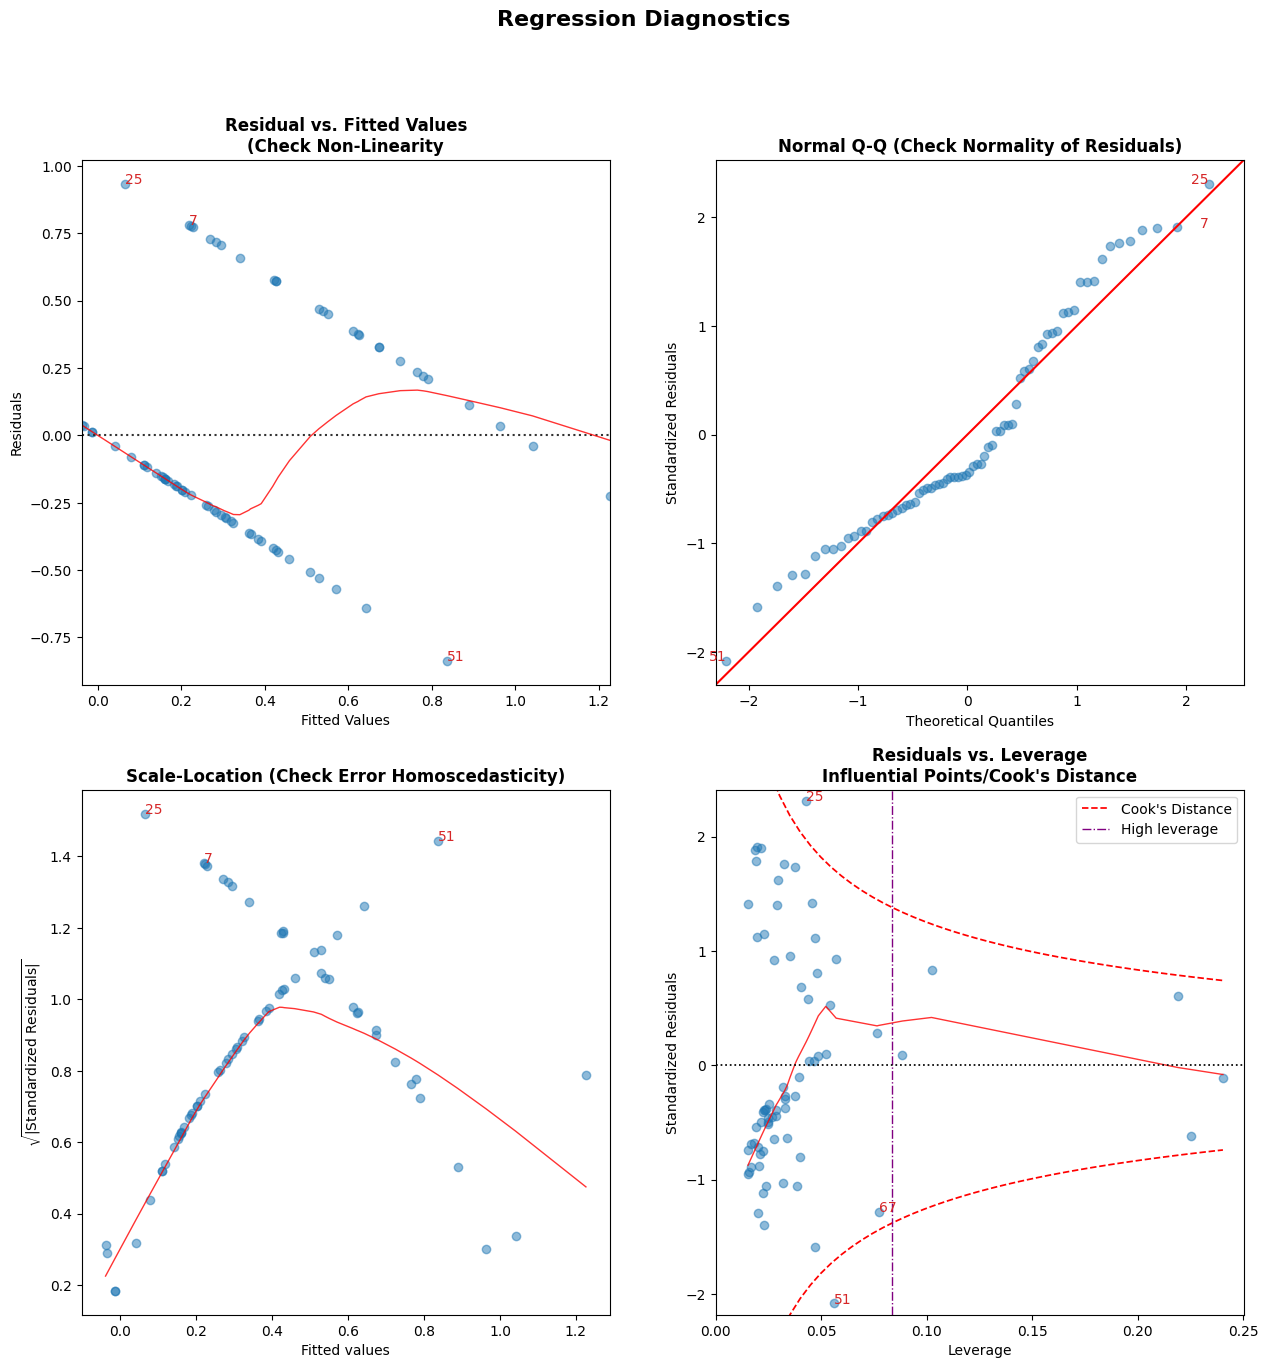

In [20]:
model, summary, extras = self.run(
    formula="OWNRENT ~ INCOME + AGE", kws_diagnostics=True)

### Logistic Regression

Running it this way changes the formula in `self.models["formula"]`. Remember to set `inplace=False` if you want to revert to the original afterwards.

In [ ]:
model, summary, extras = self.run(
    formula="OWNRENT ~ INCOME + AGE", family="logit", inplace=False)

Optimization terminated successfully.
         Current function value: 0.492144
         Iterations 6

Pseudo-R-Squared:  0.2560897850402025 

                           Logit Regression Results                           
Dep. Variable:                OWNRENT   No. Observations:                   72
Model:                          Logit   Df Residuals:                       69
Method:                           MLE   Df Model:                            2
Date:                Mon, 10 Mar 2025   Pseudo R-squ.:                  0.2561
Time:                        15:06:10   Log-Likelihood:                -35.434
converged:                       True   LL-Null:                       -47.633
Covariance Type:            nonrobust   LLR p-value:                 5.039e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0978      1.570     -3.885      0.000      -9.174 

### Other Distributions

In [22]:
_ = self.run(family="poisson")
_ = self.run(family="zip")
_ = self.run(family="nbinom_zinf")
_ = self.run(family="OrderedModel", method="bfgs")

Optimization terminated successfully.
         Current function value: 0.660944
         Iterations 6

Pseudo-R-Squared:  0.11021178997773584 

                          Poisson Regression Results                          
Dep. Variable:                OWNRENT   No. Observations:                   72
Model:                        Poisson   Df Residuals:                       69
Method:                           MLE   Df Model:                            2
Date:                Mon, 10 Mar 2025   Pseudo R-squ.:                  0.1102
Time:                        15:06:10   Log-Likelihood:                -47.588
converged:                       True   LL-Null:                       -53.482
Covariance Type:            nonrobust   LLR p-value:                  0.002755
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.5874      0.931     -3.852      0.000      -5.413

/home/elizabeth/anaconda3/envs/glmax/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:3937: RuntimeWarning: invalid value encountered in log
  a1 * np.log(a1) + y * np.log(mu) -
/home/elizabeth/anaconda3/envs/glmax/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:3938: RuntimeWarning: invalid value encountered in log
  (y + a1) * np.log(a2))
/home/elizabeth/anaconda3/envs/glmax/lib/python3.10/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/elizabeth/anaconda3/envs/glmax/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:3937: RuntimeWarning: invalid value encountered in log
  a1 * np.log(a1) + y * np.log(mu) -
/home/elizabeth/anaconda3/envs/glmax/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:3974: RuntimeWarning: invalid value encountered in log
  dgterm = dgpar

## Moderation

### Create

In [34]:
fml = "AVGEXP ~ INCOME + AGE + OWNRENT + INCOME*AGE*OWNRENT"
self = glmax.Moderation(file_path=data, model=fml)

### Explore

#### Plot Best Fit, Partialling Out Variables

/home/elizabeth/anaconda3/envs/glmax/lib/python3.10/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


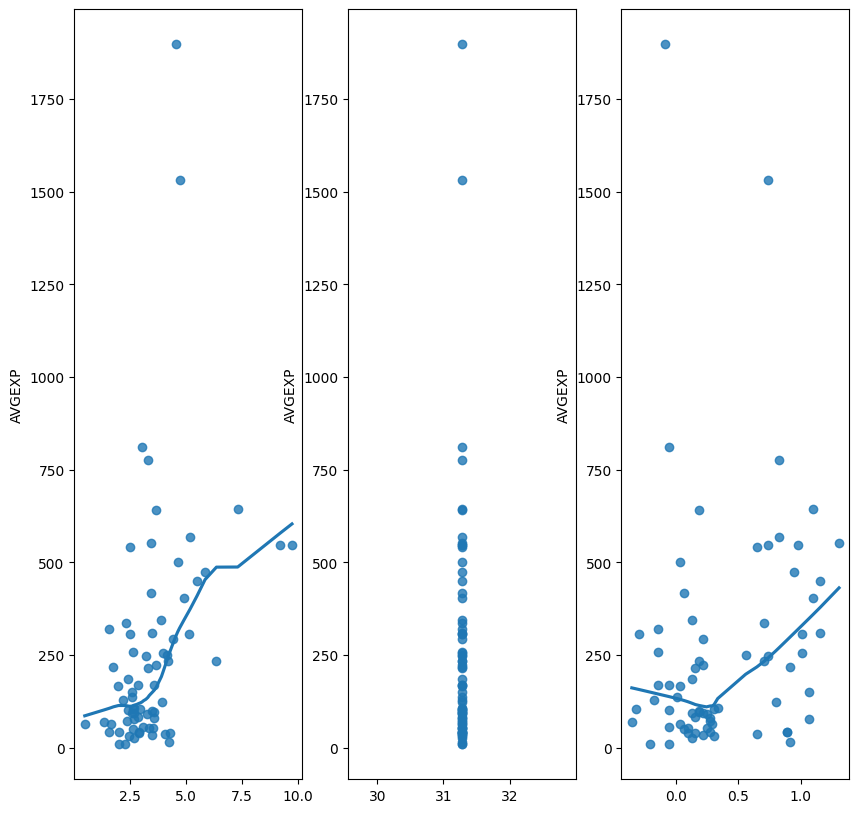

In [55]:
_ = self.plot(x_partial="AGE")

#### Plot Interaction

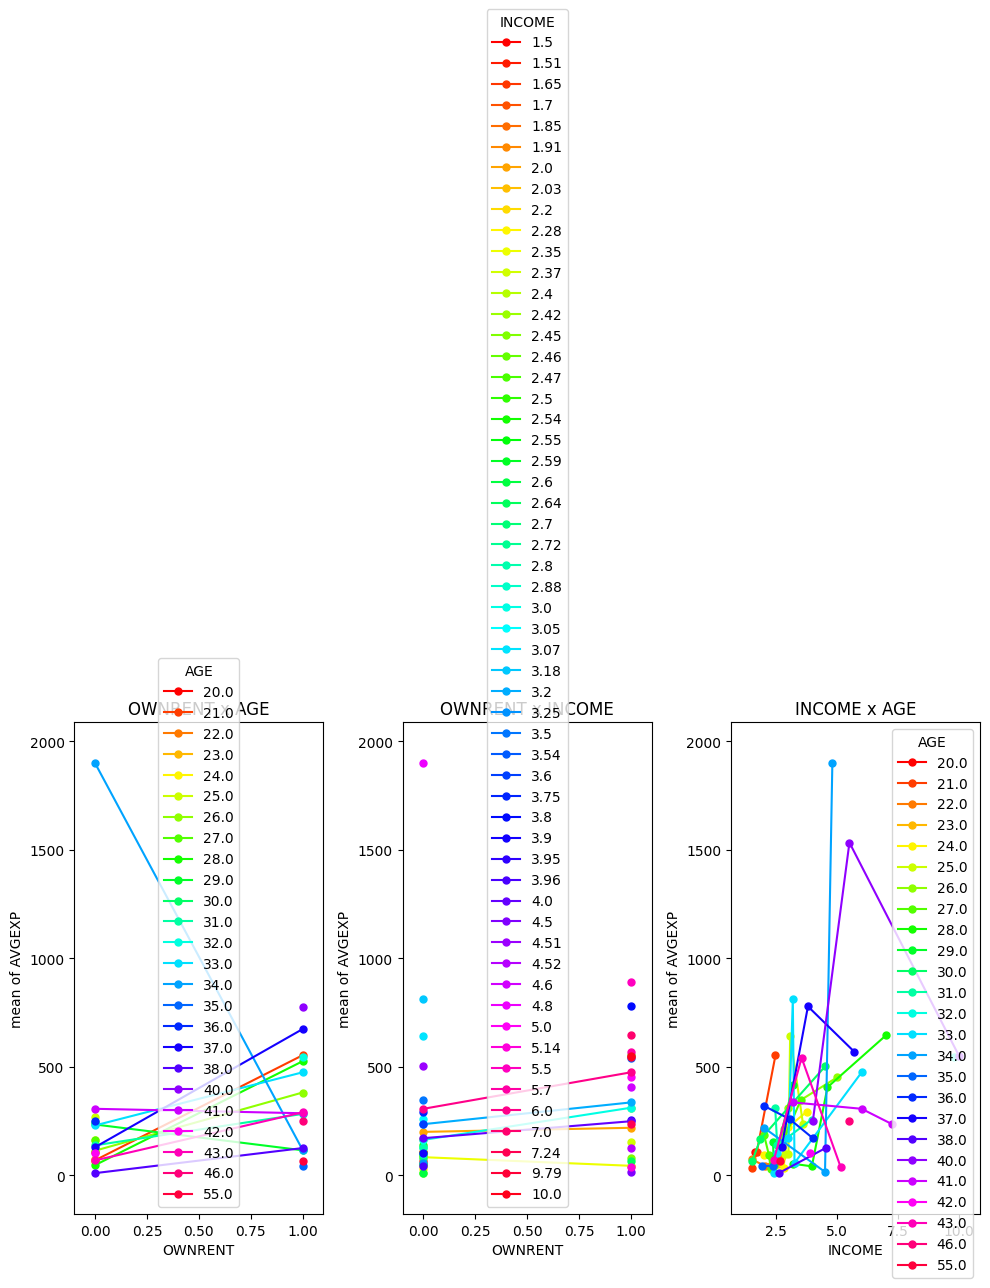

In [ ]:
fig, axes = self.plot_interaction(legendloc="best", figsize=(10, 10))

### Analyze

In [50]:
_ = self.run()

                            OLS Regression Results                            
Dep. Variable:                 AVGEXP   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     3.073
Date:                Mon, 10 Mar 2025   Prob (F-statistic):            0.00745
Time:                        15:56:50   Log-Likelihood:                -506.11
No. Observations:                  72   AIC:                             1028.
Df Residuals:                      64   BIC:                             1046.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -448.9477    632